<a href="https://colab.research.google.com/github/cristian357r4/DiplomadoCienciaDeDatos/blob/main/1_Warmup_Python_excersice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Práctica Muestreo simple y estratificado<br>

### Objetivo
Que la o el estudiante conozca cómo usar bibliotecas de Python (numpy, pandas, matplotlib) para muestrear una población y conocer la diferencia en muestro simple y estratificado.

### Descripción del procedimiento a seguir
- Se carga el conjunto de datos "GenderData.csv" (que fue creado sintéticamente para esta práctica) <br>
- Se explora el contenido del conjunto de datos y se identifican los tipos de datos.
- Se explora visualmente graficando la cantidad de Males and Females.
- Se obtiene una muestra simple y se explora visualmente la cantidad de Males and Females.
- Se obtiene una muestra estratificada y se explora visualmente la cantidad de Males and Females.
- No olvides responder las preguntas en los puntos 3 y 7.
- Haz el ejercicio con los datos del Titanic


**Profesora**: Dra. Jessica Beltrán Márquez<br>
Maestría en Ciencia de Datos y Optimización<br>
Universidad Autónoma de Coahuila

### Bibliografía

1. https://pandas.pydata.org/
2. https://numpy.org/]
3. https://matplotlib.org/
4. https://www.kaggle.com/competitions/titanic/data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1. Importar bibliotecas
Para esta práctica se utilizan las bibliotecas: <br>
Pandas [https://pandas.pydata.org/] que nos permite manipular datos para su análisis. <br>
Numpy [https://numpy.org/] para la semilla de números aleatorios <br>
Matploblib [https://matplotlib.org/] que nos permite generar gráficas. <br>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 2. Carga de datos
- Se utiliza la función "read_csv()" de Pandas para cargar el archivo "GenderData.csv" y almacenarlo en la variable "df"<br>
NOTA: Este archivo debe estar en forma local en tu computadora. Si estas usando "colab" entonces debe estar en tu "google drive".

- Se utiliza la función "head(10)" para ver los primeros 10 renglones de la matriz de datos.

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Curso ML Diplomado/1 Warmup Python/GenderData.csv')
df.head(10)

,ID,Gender,Age
0,1,Female,34
1,2,Female,29
2,3,Male,30
3,4,Female,27
4,5,Female,22
5,6,Female,30
6,7,Male,24
7,8,Female,28
8,9,Male,34
9,10,Male,35


### 3. Identificación de tipos de datos
- Como se observa en la tabla anterior, el conjunto de datos posee varias columnas. Algunas columnas contienen números, otras contienen texto.
- La o el estudiante debe analizar a que tipo de dato corresponde cada una de las variables del conjunto de datos: Categórica (Nominal, Ordinal), Numérica (Continua, Discreta).
- Nos auxiliamos de la función "dtypes" que nos indica el tipo de dato de cada una de las variables.

In [5]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [7]:
df.shape
df.Gender

0          1
1          2
2          3
3          4
4          5
        ... 
996      997
997      998
998      999
999      999
1000    1000
Name: ID, Length: 1001, dtype: int64

**Anota aqui los tipos de datos de las siguientes columnas:** <br>
Id: int64<br>
Gender: object<br>
Age: int64<br>


### 4. Exploración visual usando gráfica de barras
- Se genera una función que grafica en barras la cantidad de hombres (males) y mujeres (females) del conjunto de datos.
- Se utiliza el método value_counts() para contar la frecuencia de los valores únicos en una Serie.
- Posteriormente se manda llamar la función con el dataframe con los datos y se genera la gráfica.

In [11]:
df['Gender'].value_counts()

Male      522
Female    479
Name: Gender, dtype: int64

In [8]:
def plot_gender_distribution(dataframe):
    # Plot the number of males and females
    gender_counts = dataframe['Gender'].value_counts()
    #Male      522
    #Female    479
    #Name: Gender, dtype: int64
    plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'pink'])
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.title('Number of Males and Females')
    plt.show()

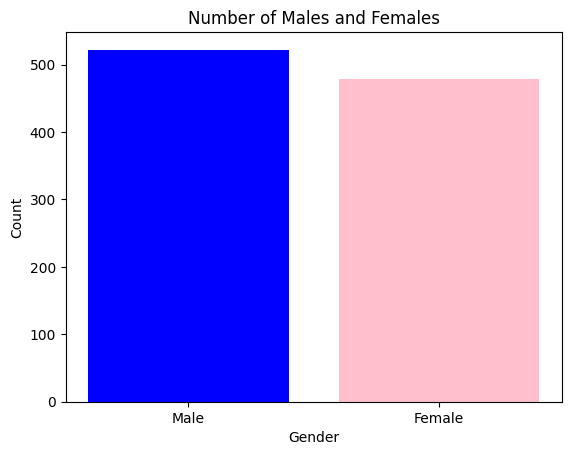

In [9]:
plot_gender_distribution(df)

### 5. Muestreo simple
- Se utiliza la función *random.seed* para inicializar el generador de números pseudoaleatorios en el módulo y tener reproducibilidad.
- Se utiliza el método *sample* de pandas para realizar un muestreo aleatorio de las filas de un DataFrame.

      ID  Gender  Age
521  522    Male   42
941  942    Male   36
741  742    Male   24
980  981  Female   36
411  412    Male   25
679  680  Female   49
673  674  Female   21
513  514  Female   22
773  774    Male   33
136  137  Female   41
889  890    Male   38
76    77    Male   20
739  740    Male   46
806  807  Female   23
939  940  Female   38
900  901    Male   20
280  281  Female   34
884  885    Male   43
572  573  Female   23
319  320  Female   47
549  550  Female   48
174  175  Female   44
371  372    Male   20
527  528    Male   23
210  211    Male   35
235  236    Male   18
101  102    Male   23
987  988  Female   50
903  904    Male   46
767  768  Female   31
346  347  Female   32
139  140    Male   34
622  623    Male   39
499  500  Female   43
370  371  Female   41
198  199  Female   24
652  653  Female   39
585  586    Male   34
863  864  Female   45
59    60  Female   26
328  329    Male   20
96    97    Male   18
312  313    Male   49
975  976    Male   36
299  300  

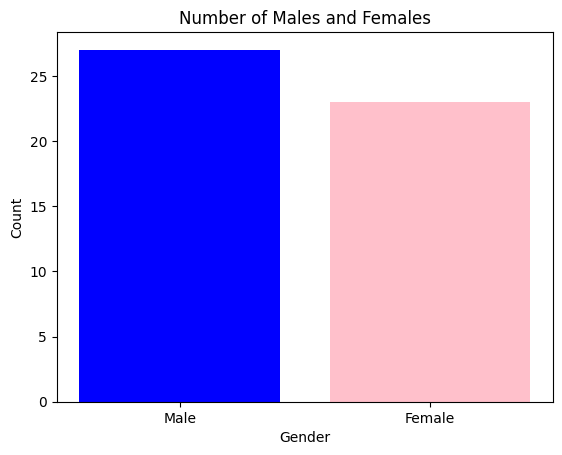

In [14]:
# Se pone una semilla para la reproducibilidad
np.random.seed(42)

# Se especifica el número de muestras a obtener
num_samples_to_obtain = 50

# Se realiza un muestreo simple
random_sample = df.sample(n=num_samples_to_obtain)

# Se imprime la muestra obtenida
print(random_sample)

#Se muestra la gráfica de barras con la cantidad de personas en cada género
plot_gender_distribution(random_sample)

### 6. Muestreo estratificado
Además de los métodos usados en el muestreo simple, aquí: <br>
- Se utiliza el método *groupby* para dividir un DataFrame en grupos basados en algunos criterios, aplicar una función a cada grupo de manera independiente y luego combinar los resultados en un nuevo DataFrame.
- La función que se aplica a cada función se pasa como parámetro a *apply*.

      ID  Gender  Age
324  325  Female   32
402  403  Female   37
796  797  Female   23
799  800  Female   32
309  310  Female   28
513  514  Female   28
178  179  Female   31
487  488  Female   30
671  672  Female   25
957  958  Female   37
585  586  Female   33
306  307  Female   21
3      4  Female   27
133  134  Female   25
939  940  Female   44
60    61  Female   27
482  483  Female   30
608  609  Female   31
485  486  Female   28
749  750  Female   30
200  201  Female   29
494  495  Female   33
116  117  Female   35
145  146  Female   29
181  182  Female   27
478  479    Male   34
108  109    Male   21
497  498    Male   28
33    34    Male   23
321  322    Male   28
259  260    Male   31
894  895    Male   32
612  613    Male   33
969  970    Male   26
567  568    Male   19
808  809    Male   36
681  682    Male   39
507  508    Male   29
725  726    Male   32
634  635    Male   28
636  637    Male   26
53    54    Male   29
502  503    Male   24
227  228    Male   30
782  783  

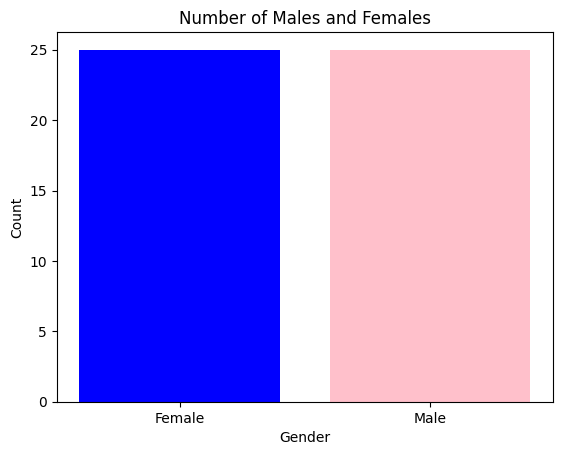

In [ ]:
# Se pone una semilla para la reproducibilidad
np.random.seed(42)

# Se especifica el número de muestras por género
num_samples_per_gender = 25

#Se define una función para obtener una muestra estratificada por cada género
def stratified_sample(group):
    return group.sample(n=num_samples_per_gender)

#Se realiza el muestreo estratificado basado en 'Gender'
stratified_sample = df.groupby('Gender', group_keys=False, sort=False).apply(stratified_sample)

# Display the stratified sample
# Se imprime la muestra obtenida
print(stratified_sample)

#Se muestra la gráfica de barras con la cantidad de personas en cada género
plot_gender_distribution(stratified_sample)

### 7. Responde lo siguiente: <br>
¿Qué diferencias tienen los conjuntos de datos muestreados en cada uno de los casos?

Descarga el conjunto de datos *train* del Titanic [https://www.kaggle.com/competitions/titanic/data] <br>
- Identifica los tipos de datos de todas las columnas: Categórica (Nominal, Ordinal), Numérica (Continua, Discreta).
- Obtén una muestra simple de 20 personas y obtén una gráfica de barras con los conteos de si sobrevivió o no.
- Obtén una muestra estratificada con 10 personas de cada grupo de si sobrevivió o no y obtén una gráfica de barras.


In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jebema","key":"651ffef1414f3a55f28407e18438d6c0"}'}

In [ ]:
pwd

'/content'

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
!kaggle datasets list

ref                                                         title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
joebeachcapital/57651-spotify-songs                         57,650 Spotify Songs                             21MB  2024-01-23 06:48:36            904         31  1.0              
juledz/heart-attack-prediction                              Heart Attack Prediction                           8KB  2024-01-19 16:11:46           1106         33  1.0              
sahilwagh/gold-stock-prices                                 Gold Stock Prices                                46KB  2024-01-22 06:54:32           1766         37  1.0              
hummaamqaasim/jobs-in-data                                  Jobs and Salaries in Data Science       

In [ ]:
!kaggle datasets download -d yasserh/titanic-dataset

  0% 0.00/22.0k [00:00<?, ?B/s]
100% 22.0k/22.0k [00:00<00:00, 30.1MB/s]


In [ ]:
!unzip titanic-dataset.zip

Archive:  titanic-dataset.zip
  inflating: Titanic-Dataset.csv     


In [ ]:
df= pd.read_csv('/content/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
